# HOTEL BOOKING ANALYSIS

### Data Dictionary

- booking_id = id for each booking
- hotel = hotel type, either resort or city hotel
- is_canceled = was the booking canceled or not. 1 for Yes(canceled) 0 for No(not canceled)
- Lead Time = Difference in days, from the booking date to arrival date
- Arrival Date Week Number = The week num they arrived
- Booking Date = The date they made their booking
- Arrival Date = The date they arrived
- Arrival Date Day of Month = the value of the day of the month they arrived
- Stays in Weekend Nights = The number of weekend nights they stayed (Saturday and Sunday)
- Stays in Week Nights = The number of week nights they stayed (Mon-Fri)
- Adults = Number of Adults
- Children = Number of Children
- Babies = Number of babies
- Meal = The type of meal (BB, FB, HB, SC, Undefined)
- Country = The country the guests are from
- Market Segment = Part of the marketing the booking came from
- Is Repeated Guest = If the guest is new or existing customer
- Previous cancellation = If they have canceled in the past
- Assigned Room Type = The type or category of room they are assigned
- Booking Changes = The number of changes they have made to their bookings
- Deposit Type = The type of the No deposit, Refundable, Non Refundable
- Agent = If they booked through an agent
- Company = If they booked through a company
- Customer Type = Type of customer they are
- Required Car Parking Spacing = If they required parking space
- Total of special request = If they made a special request.

### Needed Libraries

In [1]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Data Import/Extract

In [2]:
hotel_bookings = pd.read_excel("C:/Users/adigu/OneDrive/Desktop/9to5Data/Python for Data Analysis/project/hotel_bookings.xlsx")

hotel_bookings.head()

,booking_id,hotel,is_canceled,lead_time,arrival_date_week_number,booking_date,arrival_date,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,1,Resort Hotel,0,342,27,2017-07-24,2018-07-01,1,0,0,...,0,0,C,3,No Deposit,NaN,NaN,No Contract (Single),0,0
1,2,Resort Hotel,0,737,27,2016-06-24,2018-07-01,1,0,0,...,0,0,C,4,No Deposit,NaN,NaN,No Contract (Single),0,0
2,3,Resort Hotel,0,7,27,2018-06-24,2018-07-01,1,0,1,...,0,0,C,0,No Deposit,NaN,NaN,No Contract (Single),0,0
3,4,Resort Hotel,0,13,27,2018-06-18,2018-07-01,1,0,1,...,0,0,A,0,No Deposit,304.0,NaN,No Contract (Single),0,0
4,5,Resort Hotel,0,14,27,2018-06-17,2018-07-01,1,0,2,...,0,0,A,0,No Deposit,240.0,NaN,No Contract (Single),0,1


### Data Preprocessing

#### Data Shape

In [3]:
hotel_bookings.shape

(119390, 26)

#### Separate the bookings into different hotels

In [4]:
#Check the type of hotels

hotel_bookings['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [48]:
resort = hotel_bookings['hotel']=='Resort Hotel'

resort_hotel = hotel_bookings[resort]

resort_hotel = resort_hotel.copy()

resort_hotel.head().T

,0,1,2,3,4
booking_id,1,2,3,4,5
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_week_number,27,27,27,27,27
booking_date,2017-07-24 00:00:00,2016-06-24 00:00:00,2018-06-24 00:00:00,2018-06-18 00:00:00,2018-06-17 00:00:00
arrival_date,2018-07-01 00:00:00,2018-07-01 00:00:00,2018-07-01 00:00:00,2018-07-01 00:00:00,2018-07-01 00:00:00
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2


In [6]:
resort_hotel['hotel'].unique()

array(['Resort Hotel'], dtype=object)

In [7]:
resort_hotel.shape

(40060, 26)

In [8]:
city_hotel = hotel_bookings[~resort]

city_hotel = city_hotel.copy()

city_hotel.head()

,booking_id,hotel,is_canceled,lead_time,arrival_date_week_number,booking_date,arrival_date,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
40060,40061,City Hotel,0,6,27,2018-06-25,2018-07-01,1,0,2,...,0,0,A,0,No Deposit,6.0,NaN,No Contract (Single),0,0
40061,40062,City Hotel,1,88,27,2018-04-04,2018-07-01,1,0,4,...,0,0,A,0,No Deposit,9.0,NaN,No Contract (Single),0,1
40062,40063,City Hotel,1,65,27,2018-04-27,2018-07-01,1,0,4,...,0,0,A,0,No Deposit,9.0,NaN,No Contract (Single),0,1
40063,40064,City Hotel,1,92,27,2018-03-31,2018-07-01,1,2,4,...,0,0,A,0,No Deposit,9.0,NaN,No Contract (Single),0,2
40064,40065,City Hotel,1,100,27,2018-03-24,2018-07-02,2,0,2,...,0,0,A,0,No Deposit,9.0,NaN,No Contract (Single),0,1


In [9]:
city_hotel.shape

(79330, 26)

#### Check data info

In [10]:
resort_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40060 entries, 0 to 40059
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   40060 non-null  int64         
 1   hotel                        40060 non-null  object        
 2   is_canceled                  40060 non-null  int64         
 3   lead_time                    40060 non-null  int64         
 4   arrival_date_week_number     40060 non-null  int64         
 5   booking_date                 40060 non-null  datetime64[ns]
 6   arrival_date                 40060 non-null  datetime64[ns]
 7   arrival_date_day_of_month    40060 non-null  int64         
 8   stays_in_weekend_nights      40060 non-null  int64         
 9   stays_in_week_nights         40060 non-null  int64         
 10  adults                       40060 non-null  int64         
 11  children                     40060 non-null  f

In [11]:
city_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79330 entries, 40060 to 119389
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   79330 non-null  int64         
 1   hotel                        79330 non-null  object        
 2   is_canceled                  79330 non-null  int64         
 3   lead_time                    79330 non-null  int64         
 4   arrival_date_week_number     79330 non-null  int64         
 5   booking_date                 79330 non-null  datetime64[ns]
 6   arrival_date                 79330 non-null  datetime64[ns]
 7   arrival_date_day_of_month    79330 non-null  int64         
 8   stays_in_weekend_nights      79330 non-null  int64         
 9   stays_in_week_nights         79330 non-null  int64         
 10  adults                       79330 non-null  int64         
 11  children                     79326 non-nu

### Descriptive Analysis

In [50]:
def desc_analysis(hotel_data):
    result = hotel_data.describe().T
    return result

In [13]:
desc_analysis(resort_hotel)

,count,mean,min,25%,50%,75%,max,std
booking_id,40060.0,20030.5,1.0,10015.75,20030.5,30045.25,40060.0,11564.470229
is_canceled,40060.0,0.277634,0.0,0.0,0.0,1.0,1.0,0.447837
lead_time,40060.0,92.675686,0.0,10.0,57.0,155.0,737.0,97.285315
arrival_date_week_number,40060.0,27.140864,1.0,16.0,28.0,38.0,53.0,14.005441
booking_date,40060,2019-05-15 12:02:41.757363968,2016-06-24 00:00:00,2018-11-15 00:00:00,2019-04-26 00:00:00,2019-12-07 00:00:00,2020-08-31 00:00:00,NaN
arrival_date,40060,2019-08-16 04:15:41.068397312,2018-07-01 00:00:00,2019-02-14 00:00:00,2019-08-19 00:00:00,2020-03-05 00:00:00,2020-08-31 00:00:00,NaN
arrival_date_day_of_month,40060.0,15.821243,1.0,8.0,16.0,24.0,31.0,8.883708
stays_in_weekend_nights,40060.0,1.189815,0.0,0.0,1.0,2.0,19.0,1.147812
stays_in_week_nights,40060.0,3.128732,0.0,1.0,3.0,5.0,50.0,2.461329
adults,40060.0,1.867149,0.0,2.0,2.0,2.0,55.0,0.697285


In [14]:
desc_analysis(city_hotel)

,count,mean,min,25%,50%,75%,max,std
booking_id,79330.0,79725.5,40061.0,59893.25,79725.5,99557.75,119390.0,22900.742765
is_canceled,79330.0,0.41727,0.0,0.0,0.0,1.0,1.0,0.493111
lead_time,79330.0,109.735724,0.0,23.0,74.0,163.0,629.0,110.948526
arrival_date_week_number,79330.0,27.177449,1.0,17.0,27.0,38.0,53.0,13.398523
booking_date,79330,2019-05-18 01:08:43.413588736,2017-10-17 00:00:00,2018-12-07 00:00:00,2019-05-10 00:00:00,2019-12-10 00:00:00,2020-08-30 00:00:00,NaN
arrival_date,79330,2019-09-04 18:48:09.983612416,2018-07-01 00:00:00,2019-03-25 00:00:00,2019-09-14 00:00:00,2020-03-24 00:00:00,2020-08-31 00:00:00,NaN
arrival_date_day_of_month,79330.0,15.786625,1.0,8.0,16.0,23.0,31.0,8.728451
stays_in_weekend_nights,79330.0,0.795185,0.0,0.0,1.0,2.0,16.0,0.885026
stays_in_week_nights,79330.0,2.182957,0.0,1.0,2.0,3.0,41.0,1.456416
adults,79330.0,1.850977,0.0,2.0,2.0,2.0,4.0,0.509292


### Exploratory Data Analysis

#### 1. Monthly Bookings and Cancellations

In [15]:
#Create arrival Month

resort_hotel['booking_month'] = resort_hotel['booking_date'].dt.month

In [16]:
#check the new column booking_month

resort_hotel.head()

,booking_id,hotel,is_canceled,lead_time,arrival_date_week_number,booking_date,arrival_date,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,previous_cancellations,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests,booking_month
0,1,Resort Hotel,0,342,27,2017-07-24,2018-07-01,1,0,0,...,0,C,3,No Deposit,NaN,NaN,No Contract (Single),0,0,7
1,2,Resort Hotel,0,737,27,2016-06-24,2018-07-01,1,0,0,...,0,C,4,No Deposit,NaN,NaN,No Contract (Single),0,0,6
2,3,Resort Hotel,0,7,27,2018-06-24,2018-07-01,1,0,1,...,0,C,0,No Deposit,NaN,NaN,No Contract (Single),0,0,6
3,4,Resort Hotel,0,13,27,2018-06-18,2018-07-01,1,0,1,...,0,A,0,No Deposit,304.0,NaN,No Contract (Single),0,0,6
4,5,Resort Hotel,0,14,27,2018-06-17,2018-07-01,1,0,2,...,0,A,0,No Deposit,240.0,NaN,No Contract (Single),0,1,6


In [17]:
#summary

monthly_summary = resort_hotel.groupby(['booking_month', 'is_canceled']).size().reset_index(name='Count')


monthly_summary

,booking_month,is_canceled,Count
0,1,0,4268
1,1,1,1627
2,2,0,3363
3,2,1,1150
4,3,0,2683
5,3,1,906
6,4,0,1922
7,4,1,813
8,5,0,1844
9,5,1,816


In [18]:
#Pivot the data

pivot_df = monthly_summary.pivot(index='booking_month', columns='is_canceled', values = 'Count').fillna(0)

pivot_df

is_canceled,0,1
booking_month,,
1,4268,1627
2,3363,1150
3,2683,906
4,1922,813
5,1844,816
6,1789,812
7,1919,889
8,1844,636
9,1945,945


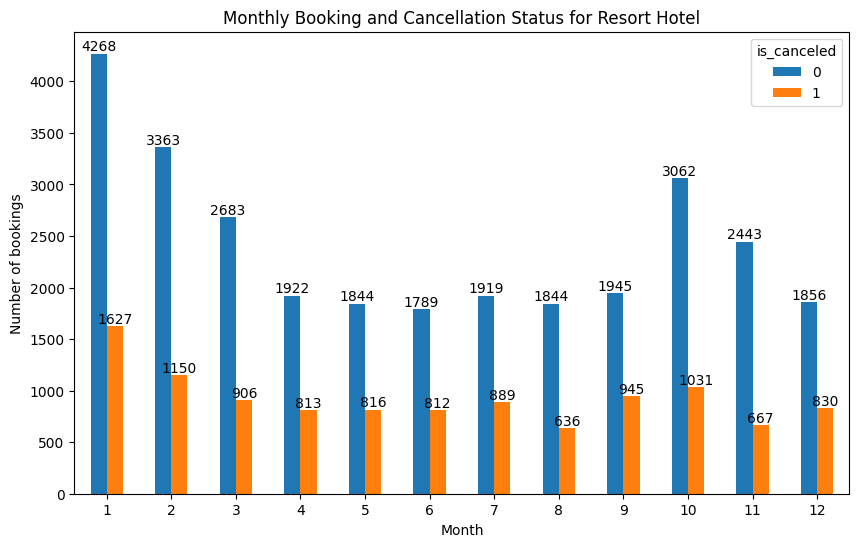

In [19]:
ax = pivot_df.plot(kind='bar', figsize=(10,6))

#Customise labels
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.title('Monthly Booking and Cancellation Status for Resort Hotel')
plt.xticks(rotation=0)

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')


plt.show()

In [27]:
def monthly_bookings(hotel_data, hotel_name):
    #Create arrival Month
    hotel_data['booking_month'] = hotel_data['booking_date'].dt.month
    
    #summary
    monthly_summary = hotel_data.groupby(['booking_month', 'is_canceled']).size().reset_index(name='Count')
    
    #Pivot the data
    pivot_df = monthly_summary.pivot(index='booking_month', columns='is_canceled', values = 'Count').fillna(0)

    #Ploting the graph
    ax = pivot_df.plot(kind='bar', figsize=(10,6))
    
    #Customise labels
    plt.xlabel('Month')
    plt.ylabel('Number of bookings')
    plt.title(f'Monthly Booking and Cancellation Status for {hotel_name}')
    plt.xticks(rotation=0)
    
    # Add data labels to the bars
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
    
    
    plt.show()
    

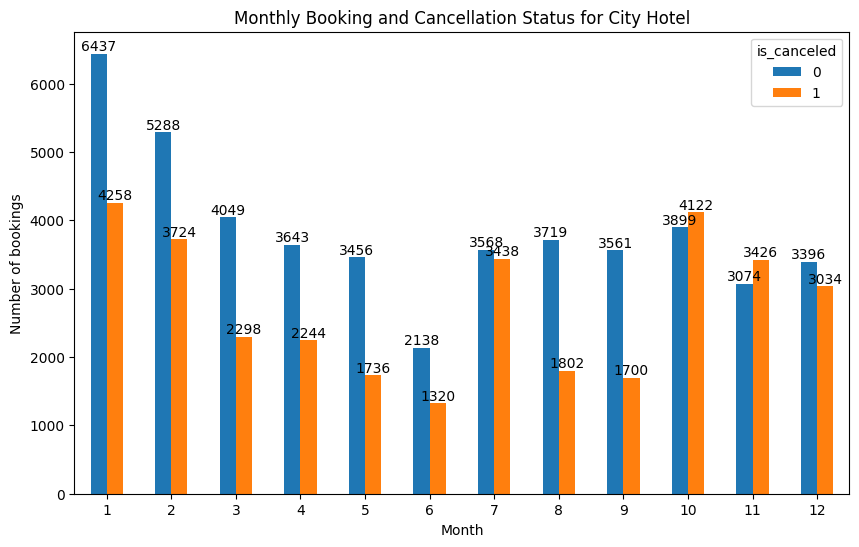

In [28]:
monthly_bookings(city_hotel, 'City Hotel')

##### Conclusion

- For the 2 hotels, bookings are always high at the beginning of the year, but decrease towards the middle of the month, and continue the upward trend again.
- For Resort Hotel, cancellation is lower at the end of the year, but it is higher for City hotel.
- Facilities improvement, new marketing tactics.

In [30]:
city_hotel.columns

Index(['booking_id', 'hotel', 'is_canceled', 'lead_time',
       'arrival_date_week_number', 'booking_date', 'arrival_date',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'is_repeated_guest',
       'previous_cancellations', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'booking_month'],
      dtype='object')

#### 2. Repeated Guests Analysis

In [33]:
def rep_guest(hotel_data, hotel_name):
    #summary of the data
    repeated_guest_summary = hotel_data['is_repeated_guest'].value_counts()

    # Define labels
    labels = ['Not Repeated Guest', 'Repeated Guest']
    
    # Get sizes (counts) in order
    sizes = repeated_guest_summary.sort_index().values
    
    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Repeated Guests at {hotel_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

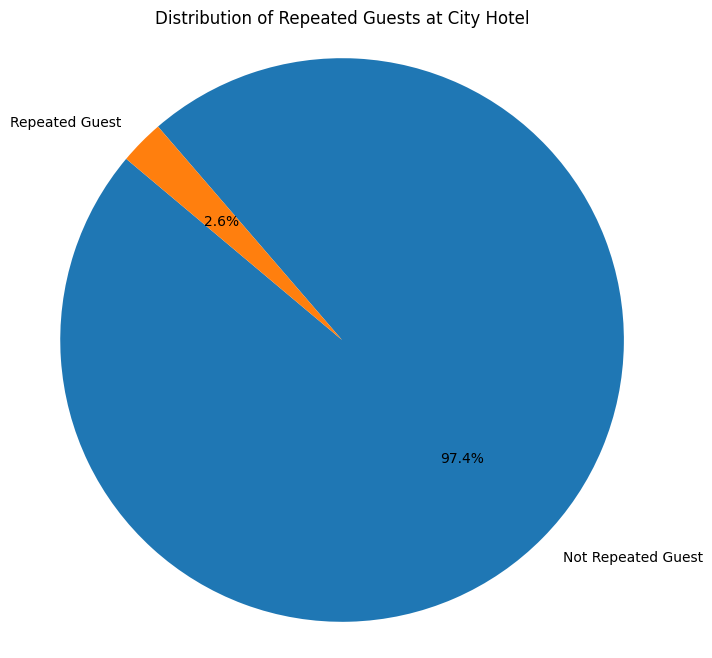

In [34]:
rep_guest(city_hotel, 'City Hotel')

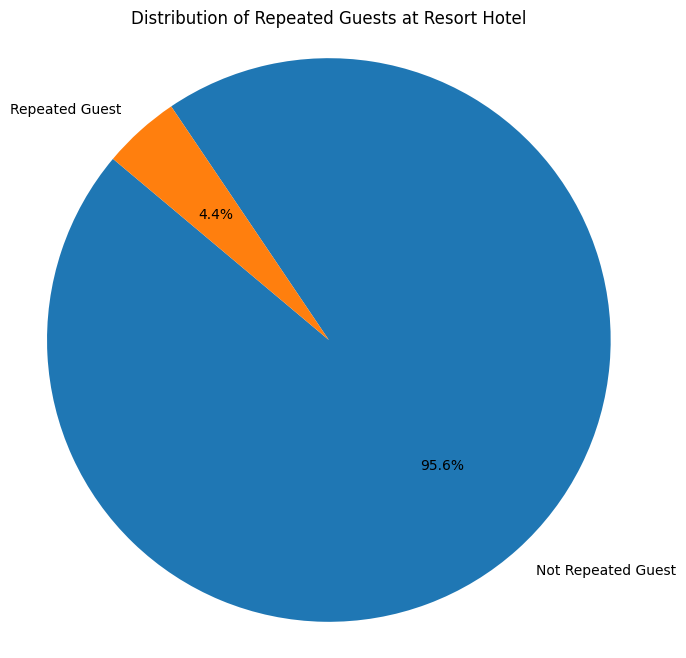

In [35]:
rep_guest(resort_hotel, 'Resort Hotel')

##### Conclusion

- For the two hotels, over 95% are new customer, which means most of the guests don't come back.
- Look into customer retention techniques, like club card, referral bonus.
- Also investigate customer service experience.

#### 3. Traveler Type

In [ ]:
if 

In [45]:
def travel_type(hotel_data, hotel_name):
    #family booking
    hotel_data['is_family_booking'] = (hotel_data['adults'] + hotel_data['children']+ hotel_data['babies'])>1

    #summary
    traveler_type_summary = hotel_data['is_family_booking'].value_counts()

    #plot
    labels = ['Single', 'Family']
    
    # Get sizes (counts) in order
    sizes = traveler_type_summary.sort_index().values
    
    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Traveler Type at {hotel_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    return traveler_type_summary

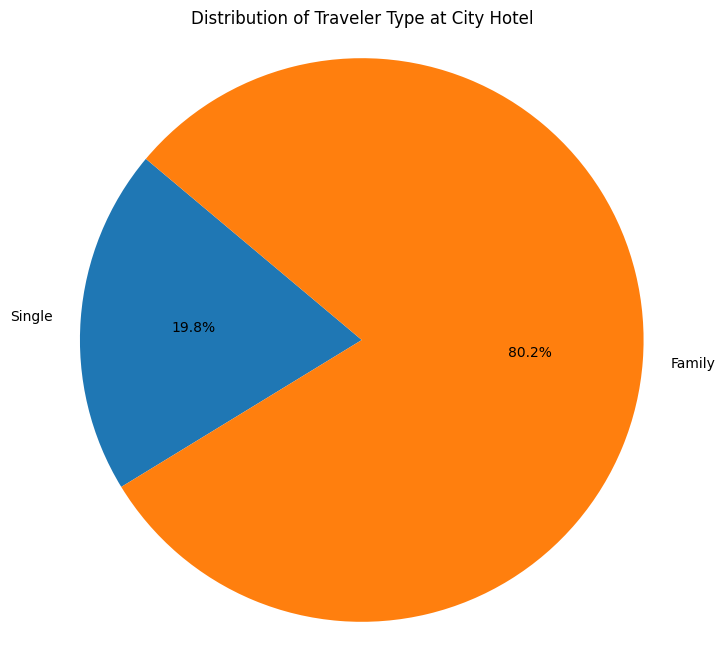

is_family_booking
True     63591
False    15739
Name: count, dtype: int64

In [46]:
#city hotel

travel_type(city_hotel,'City Hotel')

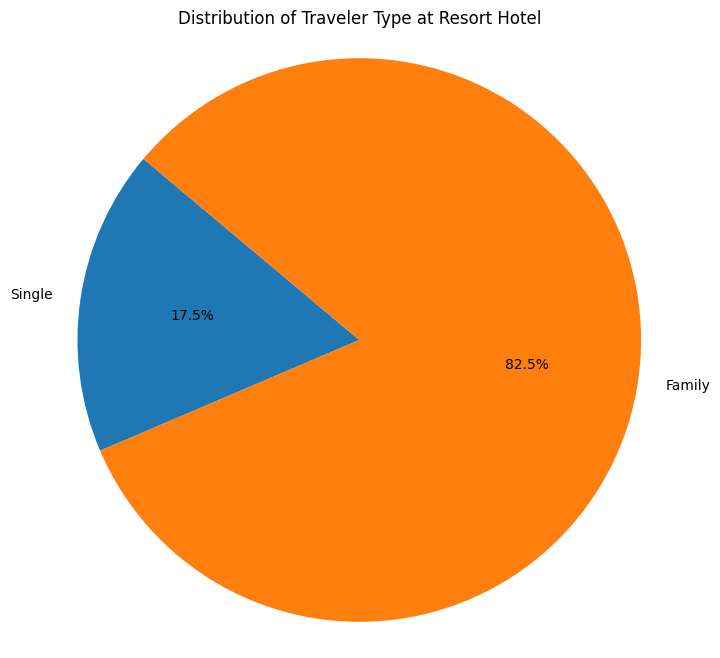

is_family_booking
True     33034
False     7026
Name: count, dtype: int64

In [47]:
#resort hotel

travel_type(resort_hotel,'Resort Hotel')

##### Conclusion

- We have families visiting the two hotels compare to single people.
- Are families the targeted customers?

#### 4. Breakdown of Guest Origins by Country

In [54]:
countries_summary = resort_hotel['country'].value_counts(ascending=True)

countries_summary

country
France                                                         1
Oman                                                           1
Poland                                                         1
Germany                                                        1
Romania                                                        2
Norway                                                         2
Switzerland                                                    3
United States of America (the)                                 8
Ireland                                                        9
Spain                                                         23
United Kingdom of Great Britain and Northern Ireland (the)    29
Portugal                                                      94
Name: count, dtype: int64

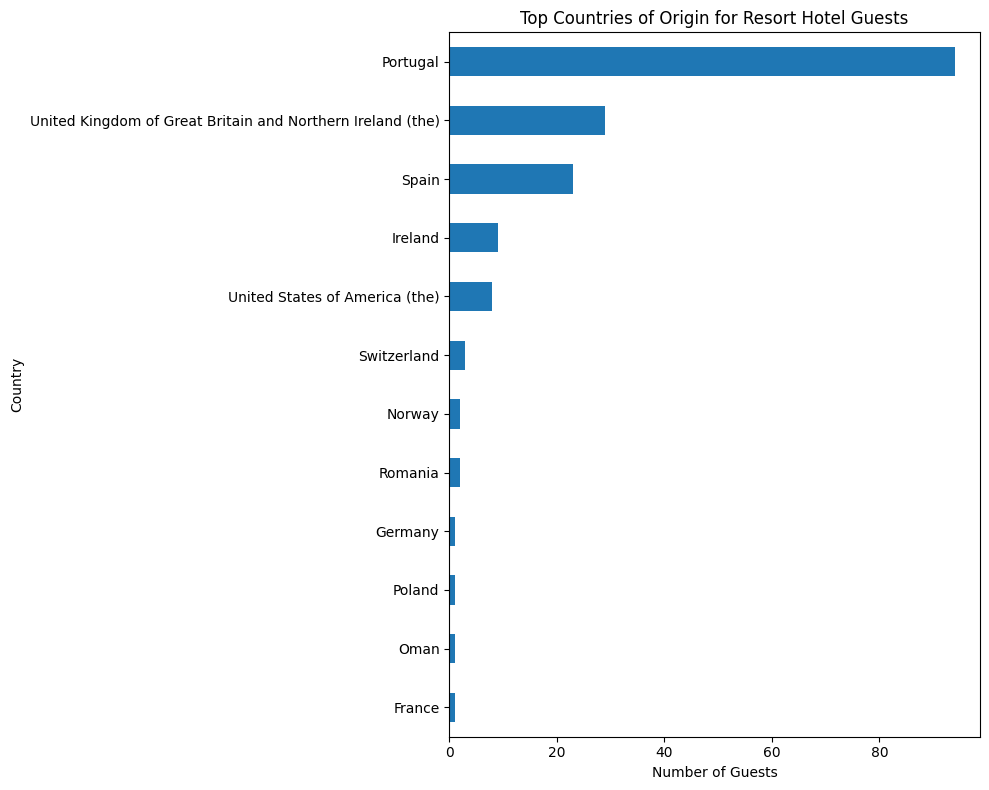

In [55]:
plt.figure(figsize=(10, 8))
countries_summary.plot(kind='barh',)
plt.title("Top Countries of Origin for Resort Hotel Guests")
plt.xlabel("Number of Guests")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

##### Conclusion

- Most our guests come from Portugal.
- Looking at the top 5 countries, we can most of customers come from Europe.
- Marketing can looking tourism package.
- International meal deals.